In [9]:
import numpy as np
import mkl
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import timeit
from rpl import RadarSignalProcessing
import sys
sys.path.append('D:\DSAI-22-24\KTH-Year2\Thesis\RADIal\DBReader')
from DBReader.DBReader import SyncReader

## 1. Load the dataset

In [18]:
sys.path.append('D:\DSAI-22-24\KTH-Year2\Thesis\RADIal')
root_folder ='D:\DSAI-22-24\KTH-Year2\Thesis\RADIal\data\RECORD@2020-11-21_11.58.53\RECORD@2020-11-21_11.58.53'
#db = SyncReader(root_folder,tolerance=40000,offset_radar = -180000,offset_scala = -40000)
db = SyncReader(root_folder,tolerance=40000,)

-------------------------------------------------------------------------
- Sensors available:
-     camera
-     can
-     gps
-     radar_ch0
-     radar_ch1
-     radar_ch2
-     radar_ch3
-     scala
-
- You might use function "setSensorFilters" to select sensors you want to read!
-------------------------------------------------------------------------
Total tolerance errors:  0.39920159680638717 %
Total corrupted frames:  3.3932135728542914 %


In [40]:
db.print_info()

Available sensors:
# Sensor:  camera
	- filename:  D:\DSAI-22-24\KTH-Year2\Thesis\RADIal\data\RECORD@2020-11-21_11.58.53\RECORD@2020-11-21_11.58.53\RECORD@2020-11-21_11.58.53_camera.mjpg
	- Nb Samples:  10591
	- Duration:  101 sec
	- Update rate:  9.547741195354545 ms
# Sensor:  can
	- filename:  D:\DSAI-22-24\KTH-Year2\Thesis\RADIal\data\RECORD@2020-11-21_11.58.53\RECORD@2020-11-21_11.58.53\RECORD@2020-11-21_11.58.53_can.bin
	- Nb Samples:  7453
	- Duration:  101 sec
	- Update rate:  13.558993962162887 ms
# Sensor:  gps
	- filename:  D:\DSAI-22-24\KTH-Year2\Thesis\RADIal\data\RECORD@2020-11-21_11.58.53\RECORD@2020-11-21_11.58.53\RECORD@2020-11-21_11.58.53_gps.ascii
	- Nb Samples:  1101
	- Duration:  101 sec
	- Update rate:  91.74089282470482 ms
# Sensor:  radar_ch0
	- filename:  D:\DSAI-22-24\KTH-Year2\Thesis\RADIal\data\RECORD@2020-11-21_11.58.53\RECORD@2020-11-21_11.58.53\RECORD@2020-11-21_11.58.53_radar_ch0.bin
	- Nb Samples:  7300
	- Duration:  100 sec
	- Update rate:  13.80931506

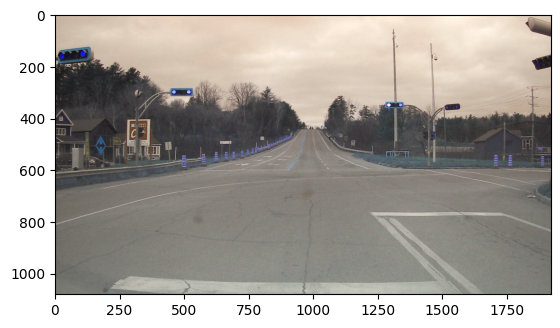

In [44]:
sample = db.GetSensorData(482)
plt.imshow(sample['camera']['data'])

## 2. RadarSignalProcessing to compute Point Cloud 

In [4]:
RSP = RadarSignalProcessing('CalibrationTable.npy',method='PC')

CPU will be used to execute the processing


In [5]:
%time pc=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: user 1.17 s, sys: 100 ms, total: 1.28 s
Wall time: 258 ms


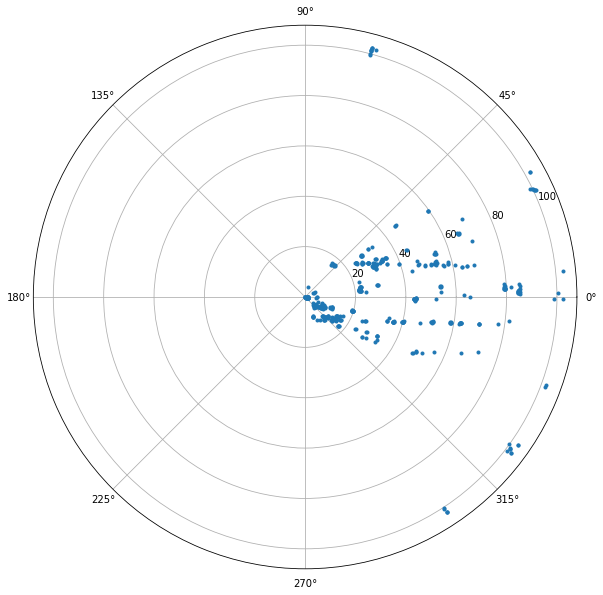

In [6]:
# PC = [Range,Doppler,Azimuth,Elevation]
Az = pc[:,2]
R = pc[:,0]
plt.figure(figsize=(10,10))
plt.polar(Az,R,'.')

## 3. RadarSignalProcessing to compute Doppler Spectrums

In [26]:
RSP = RadarSignalProcessing('CalibrationTable.npy',method='RD')

CPU will be used to execute the processing


In [27]:
%time rd=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: total: 531 ms
Wall time: 284 ms


(512, 256, 16) It has 16 channels, one for each Rx antenna


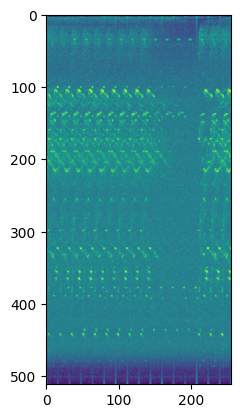

In [28]:
print(rd.shape,'It has 16 channels, one for each Rx antenna')
plt.imshow(np.log10(np.sum(np.abs(rd),axis=2)))

## 4. RadarSignalProcessing to compute Range-Azimuth map

### 4.1 Using CuPy

In [48]:
RSP = RadarSignalProcessing('CalibrationTable.npy',method='RA',device='cuda',lib='PyTorch')

PyTorch on GPU will be used to execute the processing


In [51]:
%time ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: total: 1.8 s
Wall time: 1.62 s


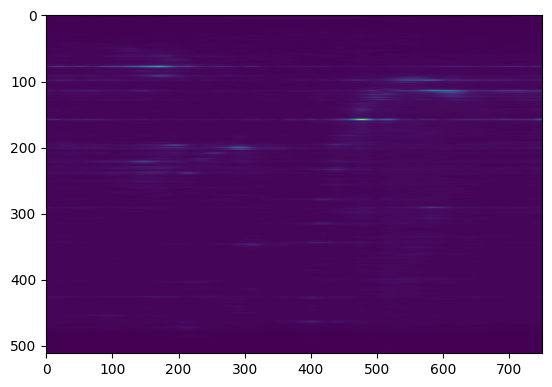

In [50]:
plt.imshow(ra)

### 4.2 Using PyTorch

In [33]:
RSP = RadarSignalProcessing('CalibrationTable.npy',method='RA',device='cuda',lib='PyTorch')

PyTorch on GPU will be used to execute the processing


In [34]:
%time ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: total: 2.47 s
Wall time: 2.21 s


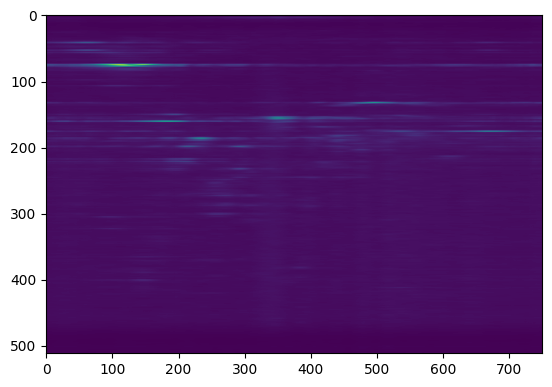

In [35]:
plt.imshow(ra)

### 4.3 Using CPU

In [16]:
RSP = RadarSignalProcessing('CalibrationTable.npy',method='RA',device='cpu')

CPU will be used to execute the processing


In [52]:
%time ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: total: 1.66 s
Wall time: 1.62 s


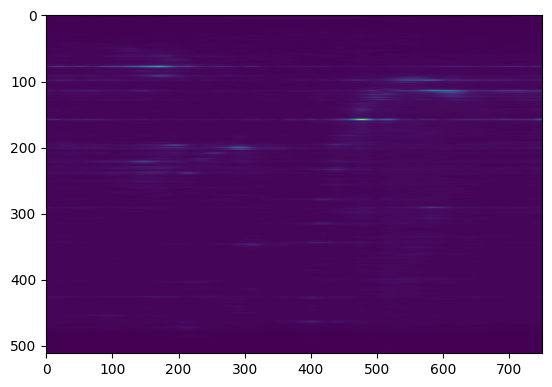

In [53]:
plt.imshow(ra)